<a href="https://colab.research.google.com/github/srz11d/Machine-Learning-Driven-Insights-into-Dynamic-Environmental-Changes/blob/main/Microbes_in_Motion_Machine_Learning_Driven_Insights_into_Dynamic_Environmental_Changes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Microbes in Motion: Machine Learning Driven Insights into Dynamic Environmental Changes**

In this project, we created a machine learning model, a **Random Forest** to find the effect of metabolic patterns and areas have on the resistance and abundance of microbial communities in a coastal area in Southport, UK

In [ ]:
#Random Forest for Taxonomic Classification
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
#Make sure to run the cell that mounts Google Drive first, and then navigate to the directory where your file is located
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to where your file is located
%cd /content/drive/MyDrive/Documents/Postdoc/Southport/

Mounted at /content/drive
/content/drive/MyDrive/Documents/Postdoc/Southport


In [ ]:
# Load the Excel file
df = pd.read_excel('Metadata_Southport.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source                 36 non-null     object 
 1   Sample                 36 non-null     object 
 2   Xylopyranoside         36 non-null     float64
 3   Glucopyranoside        36 non-null     float64
 4   sulphate               36 non-null     float64
 5   Proteobacteria         36 non-null     float64
 6   Bacteroidetes          36 non-null     float64
 7   Planctomycetes         36 non-null     float64
 8   Acidobacteria          36 non-null     float64
 9   Chloroflexi            36 non-null     float64
 10  Firmicutes             36 non-null     float64
 11  Observed_bacteria      36 non-null     int64  
 12  Simpsonindex_bacteria  36 non-null     float64
 13  Observed_Archaea       36 non-null     int64  
 14  Simpsonindex_Archaea   27 non-null     float64
dtypes: float

In [ ]:
df.head()

,Source,Sample,Xylopyranoside,Glucopyranoside,sulphate,Proteobacteria,Bacteroidetes,Planctomycetes,Acidobacteria,Chloroflexi,Firmicutes,Observed_bacteria,Simpsonindex_bacteria,Observed_Archaea,Simpsonindex_Archaea
0,Pasture,PastureResistance,36.8,103.2,5.6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.006281,737,0.996729,30,NaN
1,Pasture,PastureResistance,36.8,144.8,7.2,0.342982,0.410701,0.770134,0.291827,0.064434,0.192405,445,0.994398,30,NaN
2,Pasture,PastureResistance,35.2,99.2,5.6,0.000000,0.000000,0.000000,0.000000,0.000000,-0.949927,515,0.995354,4,0.622222
3,Pasture,PastureResilience1,9.6,49.2,19.6,0.040315,-0.129822,0.234330,-0.312582,0.292052,0.016597,344,0.993570,2,0.408163
4,Pasture,PastureResilience1,11.6,77.2,26.8,-0.069415,0.087496,-0.460115,0.010570,0.867958,0.269957,814,0.996771,4,0.459184


In [ ]:
#Let's check for null values
df.isnull().any()

Source                   False
Sample                   False
Xylopyranoside           False
Glucopyranoside          False
sulphate                 False
Proteobacteria           False
Bacteroidetes            False
Planctomycetes           False
Acidobacteria            False
Chloroflexi              False
Firmicutes               False
Observed_bacteria        False
Simpsonindex_bacteria    False
Observed_Archaea         False
Simpsonindex_Archaea      True
dtype: bool

In [ ]:
#Let's replace the null values with 0
df['Simpsonindex_Archaea'] = df['Simpsonindex_Archaea'].fillna(0)

In [ ]:
#Let's check agaibn for null values
df.isnull().any()

Source                   False
Sample                   False
Xylopyranoside           False
Glucopyranoside          False
sulphate                 False
Proteobacteria           False
Bacteroidetes            False
Planctomycetes           False
Acidobacteria            False
Chloroflexi              False
Firmicutes               False
Observed_bacteria        False
Simpsonindex_bacteria    False
Observed_Archaea         False
Simpsonindex_Archaea     False
dtype: bool

## Model Building: Random forest

In [ ]:
#Create the model with the assigned values
features = df[['Xylopyranoside', 'Glucopyranoside', 'sulphate','Source']]
target = df[['Proteobacteria']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

ValueError: ignored

Do you know what happened here??





The column "Source" is an object (Pasture, High and Low) while the rest of the columns are floats.


We can then encode our data to make it readable

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Source' column
df['Source'] = label_encoder.fit_transform(df['Source'])

In [ ]:
#Let's continue with our code

# Continue with the existing code
features = df[['Xylopyranoside', 'Glucopyranoside', 'sulphate', 'Source']]
target = df[['Proteobacteria']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

<ipython-input-12-5989ca733ef7>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Use ravel() to flatten the target variable
rf_regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

import numpy as np
# Calculate the absolute errors
errors = abs(y_pred - y_test.values.ravel())  # Use values.ravel() to get a 1D array
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.75 degrees.


The model's predictions for the target variable (in this case, y_test) are off by approximately 0.75 degrees from the actual values. Lower values of MAE indicate better accuracy, as they suggest that the model's predictions are closer to the true values.

In your specific case, an MAE of 0.75 degrees suggests that, on average, the absolute difference between the predicted and actual values is 0.75 degrees. This provides a measure of how well the regression model is performing in terms of absolute accuracy.

In [ ]:
# Let’s check the difference between the actual and predicted values
df = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred})

In [ ]:
print("y_test:", y_test)
print("y_pred:", y_pred)

y_test:     Proteobacteria
35        0.458134
13        0.828704
26        0.712584
30       -0.883656
16       -0.254985
31        0.877929
21       -0.664755
12        0.664755
y_pred: [-0.09140055  0.0628103  -0.20374456 -0.05518916  0.07988535  0.14699007
  0.3709147  -0.16304682]


In [ ]:
print("NaN in y_test:", np.isnan(y_test).any())
print("NaN in y_pred:", np.isnan(y_pred).any())
print("Infinite values in y_test:", np.isinf(y_test).any())
print("Infinite values in y_pred:", np.isinf(y_pred).any())

NaN in y_test: Proteobacteria    False
dtype: bool
NaN in y_pred: False
Infinite values in y_test: Proteobacteria    False
dtype: bool
Infinite values in y_pred: False


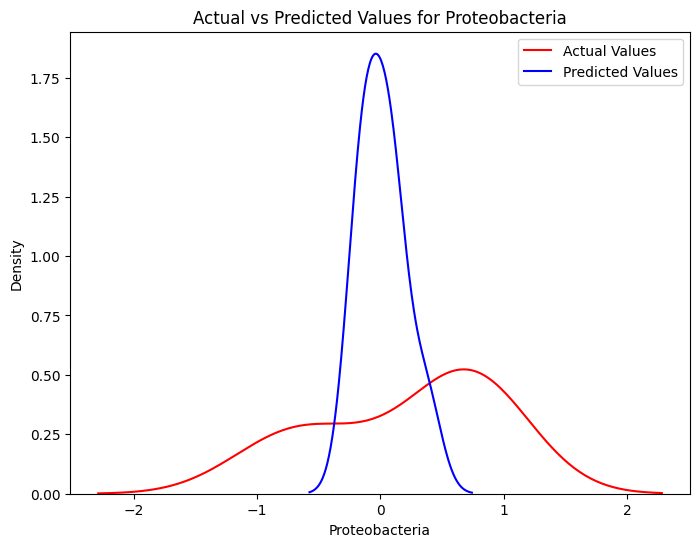

In [ ]:
# Convert y_test and y_pred to NumPy arrays
y_test_array = y_test['Proteobacteria'].values
y_pred_array = y_pred

# Plot the distribution of actual and predicted values
plt.figure(figsize=(8, 6))
sns.kdeplot(data=y_test_array, color="r", label="Actual Values")
sns.kdeplot(data=y_pred_array, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for Proteobacteria')
plt.xlabel('Proteobacteria')
plt.ylabel('Density')
plt.legend()
plt.show()

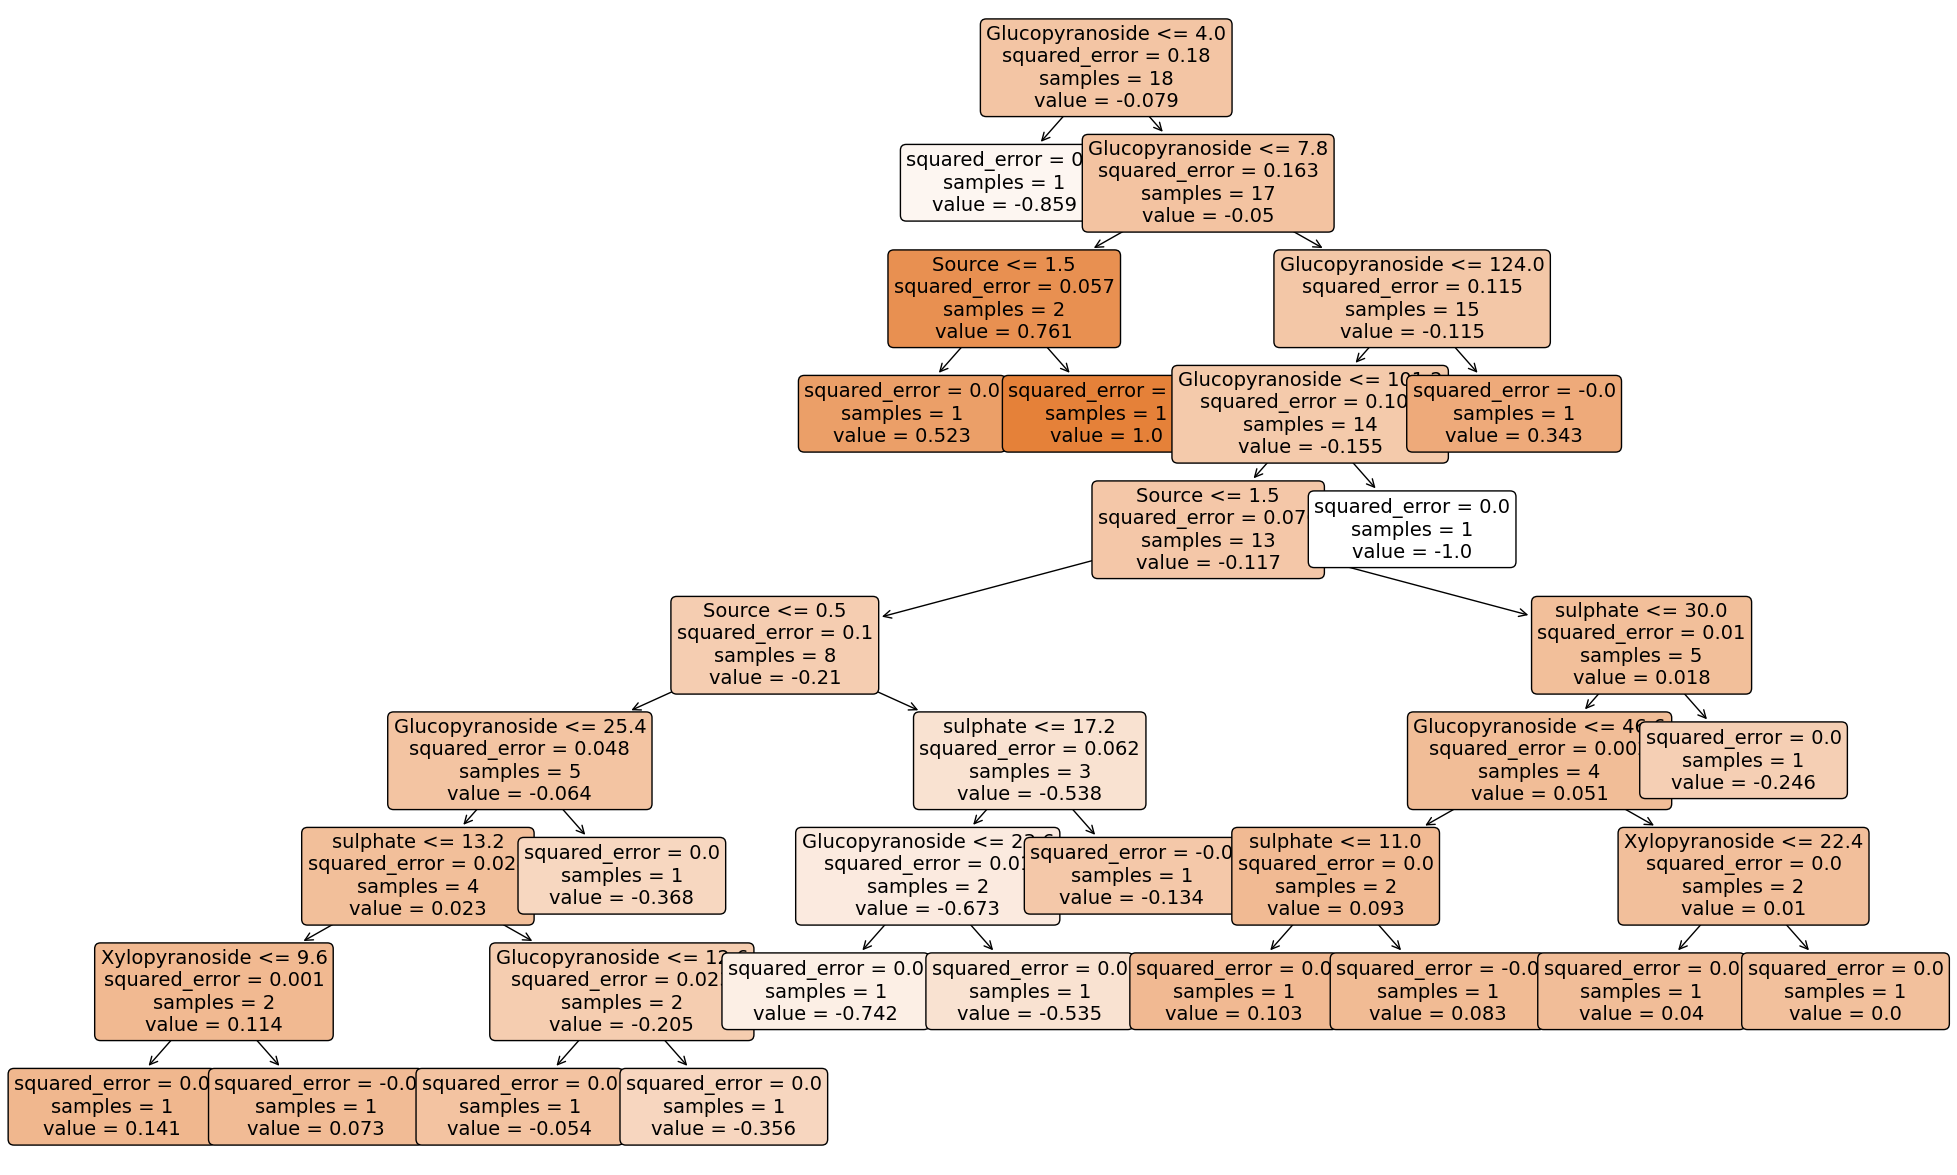

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_regressor is your RandomForestRegressor
# Pull out one tree from the forest
tree_to_plot = rf_regressor.estimators_[5]

# Set the figure size
plt.figure(figsize=(25, 15))

# Plot the selected tree
plot_tree(tree_to_plot, filled=True, rounded=True, fontsize=14, feature_names=features.columns)

# Show the plot
plt.show()

In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.60
R-squared: -0.37


Mean Squared Error (MSE): measures the average squared difference between the actual and predicted values. Lower values of MSE indicate better model performance.

R-squared is a measure of how well the predicted values match the actual values. It ranges from 0 to 1, where 1 indicates a perfect fit, and values close to 0 suggest that the model does not explain much of the variability in the data.

An MSE of 0.60 is relatively low, but its interpretation depends on the scale of the target variable.
An R-squared of -0.37 indicates that the model is not explaining much of the variability in the data and may not be a good fit for the given problem.

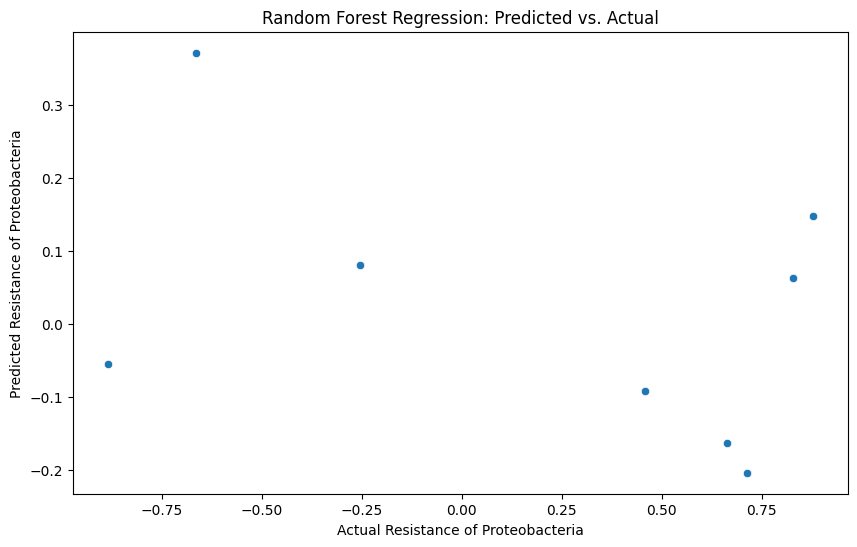

In [ ]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred)
plt.xlabel('Actual Resistance of Proteobacteria')
plt.ylabel('Predicted Resistance of Proteobacteria')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.show()

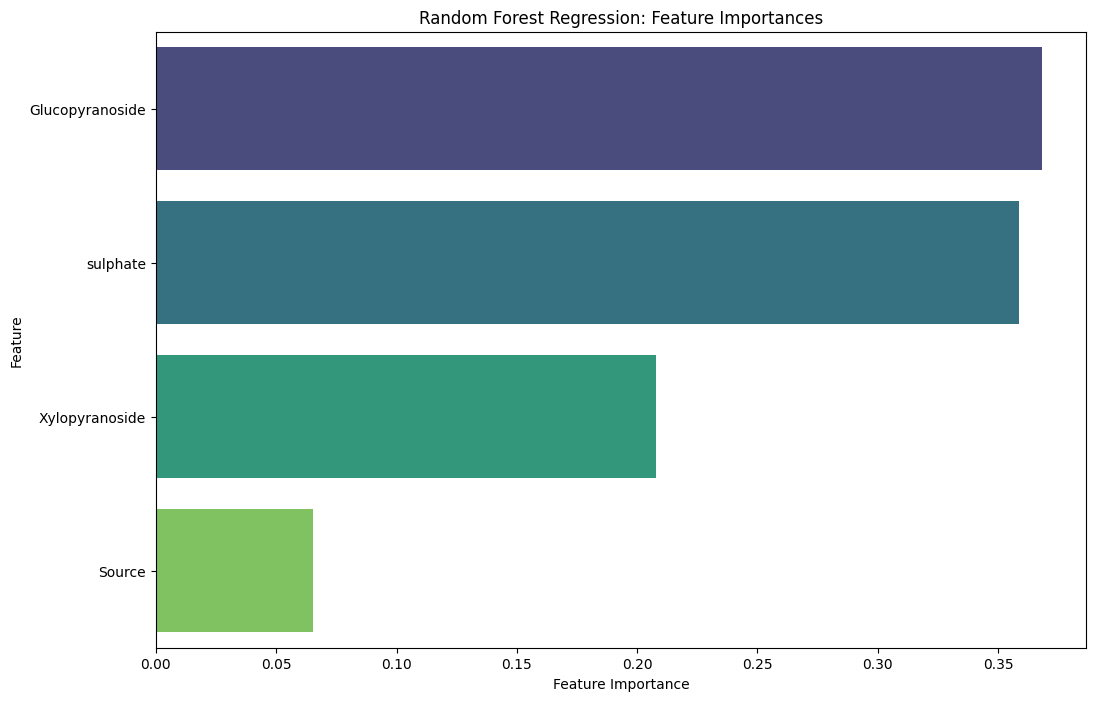

In [ ]:
# Get feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = features.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regression: Feature Importances')
plt.show()

What is this graph telling us?
How can we improve our model?

In [ ]:
## Create the model with the assigned values
features = df[['Glucopyranoside', 'sulphate', 'Xylopyranoside']]
target = df[['Proteobacteria']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.values.ravel())  # Use ravel() to flatten the target variable

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.59
R-squared: -0.34


What if we try a different parameter?

In [ ]:
## Create the model with the assigned values
features = df[['Glucopyranoside', 'sulphate', 'Xylopyranoside', 'Source']]
target = df[['Observed_bacteria']]

#Label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Source' column
df['Source'] = label_encoder.fit_transform(df['Source'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.values.ravel())  # Use ravel() to flatten the target variable

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 26641.44
R-squared: 0.42


 The R-squared value is 0.42. This indicates that the model explains 42% of the variability in the observed bacteria data. Compared to the negative R-squared values in the previous models, this is an improvement. However, an R-squared of 0.42 suggests that there is still a significant amount of variability in the data that is not explained by the model.

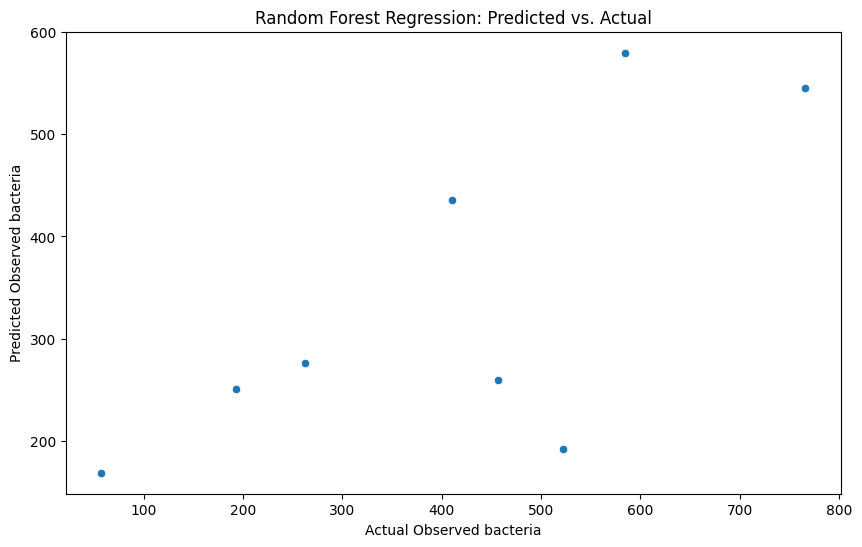

In [ ]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred)
plt.xlabel('Actual Observed bacteria')
plt.ylabel('Predicted Observed bacteria')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.show()

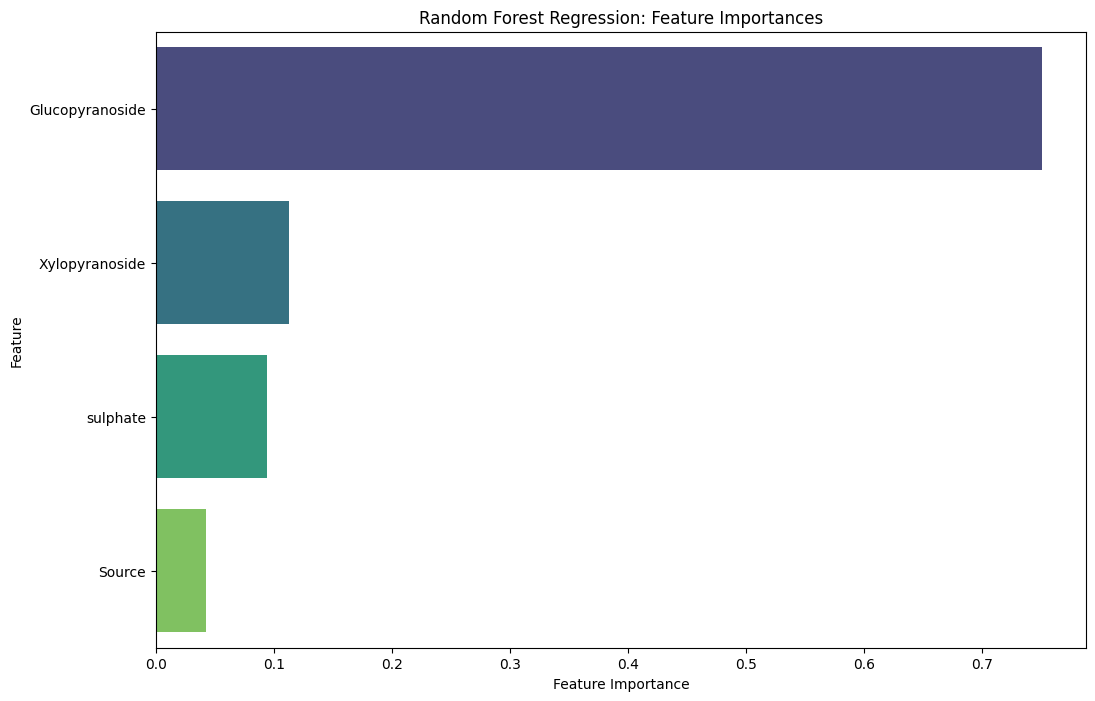

In [ ]:
# Get feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = features.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regression: Feature Importances')
plt.show()